In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import gzip
import seaborn as sns
import glob
import pandas as pd

files=sorted(glob.glob("trajs_alpha90/*.npy"))
labels=['bell1','bell2','bell3','bell4','ghz','w','random_2','random_3','sup_2','sup_3']
nn=[2,2,2,2,3,3,2,3,2,3]
etas=np.round(np.linspace(0,2.0,21),1)

df=[]
for id1,label in enumerate(labels):
    n=nn[id1]
    for eta in etas:
        files=sorted(glob.glob(f"trajs_alpha90/traj_nn{n}_{label}_eta{eta}_*.npy"))
        phi_all=[]
        P_all=[]
        E_all=[]
        for f in files:
            data=np.load(f,allow_pickle=True).item()
            V=data['V']
            phi=np.linalg.norm(np.mean(V,axis=1),axis=1)
            P=data['P']
            E=data['E']

            phi_all.append(phi)
            P_all.append(P)
            E_all.append(E)

        # print(len(phi_all),len(P_all),len(E_all))
        Phi_avg =np.mean(phi_all,axis=0)
        P_avg =np.mean(P_all,axis=0)
        E_avg =np.mean(np.abs(E_all),axis=0)

        df.append({'label':label,'eta':eta,'phi':Phi_avg,'P':P_avg,'E':E_avg})


df=pd.DataFrame(df)

df


,label,eta,phi,P,E
0,bell1,0.0,"[0.05556102501659321, 0.08903213992740946, 0.1...","[343.0847210871113, 343.17087645506115, 349.83...","[805.7965296832118, 822.6722902043432, 857.762..."
1,bell1,0.1,"[0.057807443217341284, 0.10584593141966472, 0....","[337.57587873389645, 338.50361953819214, 342.6...","[807.6391777604056, 846.0017485094698, 845.724..."
2,bell1,0.2,"[0.059145453889106504, 0.09282247291259771, 0....","[345.3979230005722, 345.66231370233675, 343.67...","[790.0059445960857, 836.6995715250756, 819.045..."
3,bell1,0.3,"[0.06988561663763766, 0.09753395222432468, 0.1...","[337.6485045217354, 338.72674523947023, 338.93...","[808.0769318536426, 822.3294484510316, 874.260..."
4,bell1,0.4,"[0.05984288144539042, 0.09036071526097253, 0.1...","[340.41939824206963, 341.86901286906607, 344.7...","[765.4868007718599, 903.5969683252579, 818.777..."
...,...,...,...,...,...
205,sup_3,1.6,"[0.06732334760769217, 0.11435202442701195, 0.1...","[579.4647470482404, 611.4985796413422, 613.930...","[3163.8051510580094, 3336.105818780636, 3545.8..."
206,sup_3,1.7,"[0.06140031700504476, 0.10634671230601826, 0.1...","[595.7697606810129, 595.2180861297504, 619.191...","[3181.696506518597, 3381.285218793228, 3841.60..."
207,sup_3,1.8,"[0.05351045640284256, 0.09597266827096473, 0.1...","[579.3988192851737, 580.3613371760439, 586.772...","[3308.188273928875, 3301.651320071001, 3477.34..."
208,sup_3,1.9,"[0.08693465254671846, 0.12710916067669226, 0.1...","[593.1263178196159, 566.3920721940815, 578.421...","[3156.756582410516, 3899.4483933354823, 3747.1..."


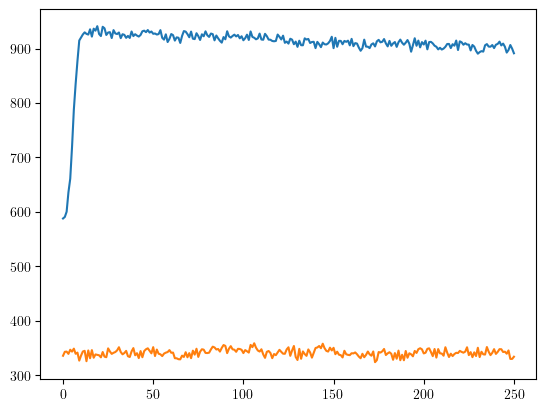

In [15]:
# plt.plot(df.iloc[-10]['E'])
plt.plot(df.iloc[-10]['P'])
plt.plot(df.iloc[10]['P'])

In [16]:
data=df[(df['label']=='bell1') & (df['eta']==0.2)]
len(data['phi'].to_numpy())

1

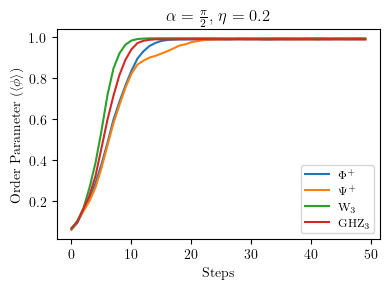

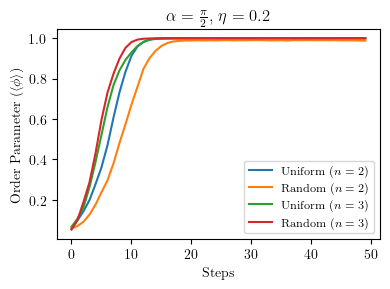

In [17]:

plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'  # Load amsmath package
# plt.rc('font', family='serif', serif=['Computer Modern Roman'])  # Set LaTeX font

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(4, 3))
steps=np.linspace(0,1000,1001)


labels=['bell1','bell3','w','ghz']

for label in labels:
    data=df[(df['label']==label) & (df['eta']==0.2)]
    plt.plot(data['phi'].to_numpy()[0][:50])


plt.xlabel(r'Steps')
plt.ylabel(r'Order Parameter ($\langle \phi \rangle$)')
# plt.title()
plt.legend([r'$\Phi^+$', r'$\Psi^+$',
            r'$\text{W}_3$',r'$\text{GHZ}_3$'], fontsize='small')

plt.title(r'$\alpha=\frac{\pi}{2}$, $\eta=0.2$')
plt.tight_layout()
plt.savefig(f'plots/op_alpha90_1.pdf',bbox_inches='tight')

plt.show()



plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'  # Load amsmath package
# plt.rc('font', family='serif', serif=['Computer Modern Roman'])  # Set LaTeX font

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(4, 3))
steps=np.linspace(0,1000,1001)


labels=['sup_2','random_2','sup_3','random_3']

for label in labels:
    data=df[(df['label']==label) & (df['eta']==0.2)]
    plt.plot(data['phi'].to_numpy()[0][:50])


plt.xlabel(r'Steps')
plt.ylabel(r'Order Parameter ($\langle \phi \rangle$)')
# plt.title()
plt.legend([r'Uniform ($n=2$)',r'Random ($n=2$)',r'Uniform ($n=3$)',r'Random ($n=3$)'], fontsize='small')

plt.title(r'$\alpha=\frac{\pi}{2}$, $\eta=0.2$')
plt.tight_layout()
plt.savefig(f'plots/op_alpha90_2.pdf',bbox_inches='tight')

plt.show()






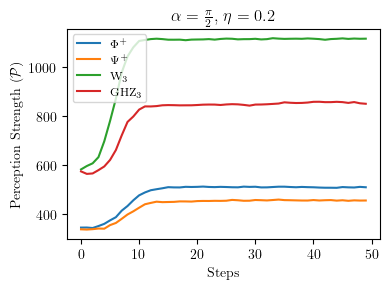

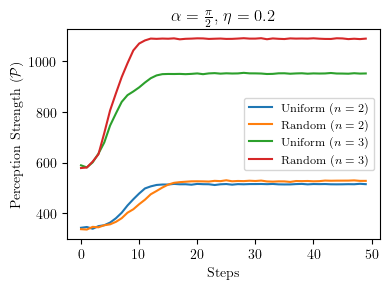

In [18]:

plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'  # Load amsmath package
# plt.rc('font', family='serif', serif=['Computer Modern Roman'])  # Set LaTeX font

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(4, 3))
steps=np.linspace(0,1000,1001)


labels=['bell1','bell3','w','ghz']

for label in labels:
    data=df[(df['label']==label) & (df['eta']==0.2)]
    plt.plot(data['P'].to_numpy()[0][:50])


plt.xlabel(r'Steps')
plt.ylabel(r'Perception Strength ($\cal{P}$)')
# plt.title()
plt.legend([r'$\Phi^+$', r'$\Psi^+$',
            r'$\text{W}_3$',r'$\text{GHZ}_3$'], fontsize='small')

plt.title(r'$\alpha=\frac{\pi}{2}$, $\eta=0.2$')
plt.tight_layout()
plt.savefig(f'plots/perception_alpha90_1.pdf',bbox_inches='tight')

plt.show()



plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'  # Load amsmath package
# plt.rc('font', family='serif', serif=['Computer Modern Roman'])  # Set LaTeX font

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(4, 3))
steps=np.linspace(0,1000,1001)


labels=['sup_2','random_2','sup_3','random_3']

for label in labels:
    data=df[(df['label']==label) & (df['eta']==0.2)]
    plt.plot(data['P'].to_numpy()[0][:50])


plt.xlabel(r'Steps')
plt.ylabel(r'Perception Strength ($\cal{P}$)')
# plt.title()
plt.legend([r'Uniform ($n=2$)',r'Random ($n=2$)',r'Uniform ($n=3$)',r'Random ($n=3$)'], fontsize='small')

plt.title(r'$\alpha=\frac{\pi}{2}$, $\eta=0.2$')
plt.tight_layout()
plt.savefig(f'plots/perception_alpha90_2.pdf',bbox_inches='tight')

plt.show()






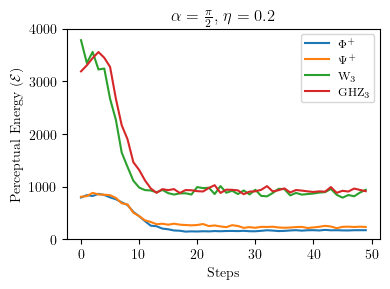

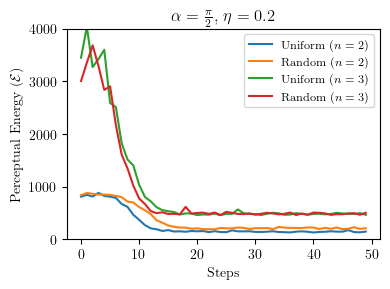

In [19]:

plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'  # Load amsmath package
# plt.rc('font', family='serif', serif=['Computer Modern Roman'])  # Set LaTeX font

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(4, 3))
steps=np.linspace(0,1000,1001)


labels=['bell1','bell3','w','ghz']

for label in labels:
    data=df[(df['label']==label) & (df['eta']==0.2)]
    plt.plot(data['E'].to_numpy()[0][:50])


plt.ylim([0,4000])
plt.xlabel(r'Steps')
plt.ylabel(r'Perceptual Energy ($\cal{E}$)')
# plt.title()
plt.legend([r'$\Phi^+$', r'$\Psi^+$',
            r'$\text{W}_3$',r'$\text{GHZ}_3$'], fontsize='small')

plt.title(r'$\alpha=\frac{\pi}{2}$, $\eta=0.2$')
plt.tight_layout()
plt.savefig(f'plots/energy_alpha90_1.pdf',bbox_inches='tight')

plt.show()



plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'  # Load amsmath package
# plt.rc('font', family='serif', serif=['Computer Modern Roman'])  # Set LaTeX font

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(4, 3))
steps=np.linspace(0,1000,1001)


labels=['sup_2','random_2','sup_3','random_3']

for label in labels:
    data=df[(df['label']==label) & (df['eta']==0.2)]
    plt.plot(data['E'].to_numpy()[0][:50])

plt.ylim([0,4000])
plt.xlabel(r'Steps')
plt.ylabel(r'Perceptual Energy ($\cal{E}$)')
# plt.title()
plt.legend([r'Uniform ($n=2$)',r'Random ($n=2$)',r'Uniform ($n=3$)',r'Random ($n=3$)'], fontsize='small')

plt.title(r'$\alpha=\frac{\pi}{2}$, $\eta=0.2$')
plt.tight_layout()
plt.savefig(f'plots/energy_alpha90_2.pdf',bbox_inches='tight')

plt.show()






In [20]:
data=df[(df['label']=='bell1')]
y=[el.tolist() for el in data['phi'].to_list()]
y=np.asarray(y)
np.mean(y,axis=1)

array([0.97607117, 0.97564412, 0.96282744, 0.94704724, 0.91423818,
       0.83914933, 0.60088695, 0.23379105, 0.15080967, 0.11813696,
       0.09602842, 0.09423102, 0.08835037, 0.08614506, 0.08231722,
       0.08278232, 0.07701338, 0.07858225, 0.07881562, 0.07238582,
       0.0745314 ])

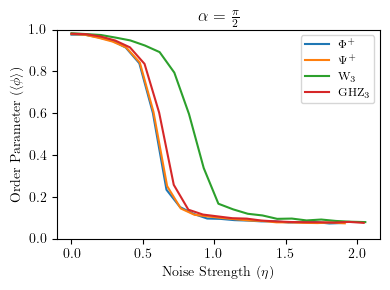

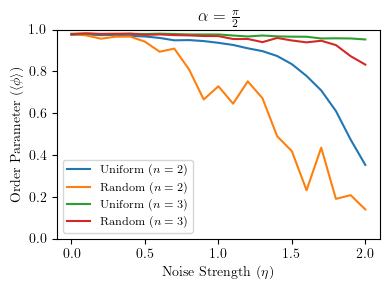

In [38]:

plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'  # Load amsmath package
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(4, 3))
steps=np.linspace(0,1000,1001)

etas=np.linspace(0,2,21)
labels=['bell1','bell3','w','ghz']
legnds=[r'$\Phi^+$',r'$\Psi^+$',r'$\text{W}_3$',r'$\text{GHZ}_3$']

for idx,label in enumerate(labels):
    data=df[(df['label']==label)]
    y=[el.tolist() for el in data['phi'].to_list()]
    y=np.asarray(y)
    plt.plot(etas*(np.random.uniform(0.95, 1.05)),np.mean(y[:,:],axis=1))


plt.xlabel(r'Noise Strength ($\eta$)')
plt.ylabel(r'Order Parameter ($\langle \phi \rangle$)')
plt.ylim([0,1])
plt.legend(legnds, fontsize='small')

plt.title(r'$\alpha=\frac{\pi}{2}$')
plt.tight_layout()
plt.savefig(f'plots/op_eta_alpha90_1.pdf',bbox_inches='tight')
plt.show()


plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'  # Load amsmath package
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(4, 3))
steps=np.linspace(0,1000,1001)

etas=np.linspace(0,2,21)
labels=['sup_2','random_2','sup_3','random_3']
legnds=[r'$\Phi^+$',r'$\Psi^+$',r'$\text{W}_3$',r'$\text{GHZ}_3$']

for label in labels:
    data=df[(df['label']==label)]
    y=[el.tolist() for el in data['phi'].to_list()]
    y=np.asarray(y)
    plt.plot(etas,np.mean(y[:,:],axis=1))


plt.xlabel(r'Noise Strength ($\eta$)')
plt.ylabel(r'Order Parameter ($\langle \phi \rangle$)')
plt.ylim([0,1])
plt.legend([r'Uniform ($n=2$)',r'Random ($n=2$)',r'Uniform ($n=3$)',r'Random ($n=3$)'], fontsize='small')

plt.title(r'$\alpha=\frac{\pi}{2}$')
plt.tight_layout()
plt.savefig(f'plots/op_eta_alpha90_2.pdf',bbox_inches='tight')
plt.show()




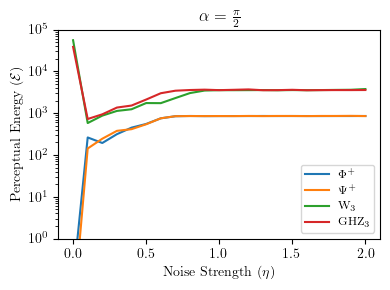

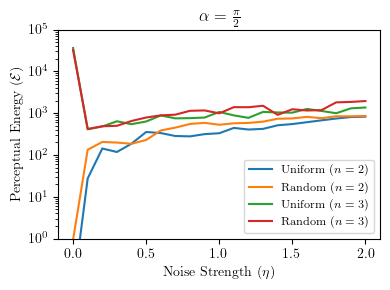

In [4]:

plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'  # Load amsmath package
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(4, 3))
steps=np.linspace(0,1000,1001)

etas=np.linspace(0,2,21)
labels=['bell1','bell3','w','ghz']
legnds=[r'$\Phi^+$',r'$\Psi^+$',r'$\text{W}_3$',r'$\text{GHZ}_3$']

for label in labels:
    data=df[(df['label']==label)]
    y=[el.tolist() for el in data['E'].to_list()]
    y=np.asarray(y)
    plt.plot(etas,np.mean(y[:,30:150],axis=1))


plt.xlabel(r'Noise Strength ($\eta$)')
plt.ylabel(r'Perceptual Energy ($\cal{E}$)')
plt.ylim([1,1e5])
plt.legend(legnds, fontsize='small')
plt.yscale('log')

plt.title(r'$\alpha=\frac{\pi}{2}$')
plt.tight_layout()
plt.savefig(f'plots/energy_eta_alpha90_1.pdf',bbox_inches='tight')
plt.show()


plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'  # Load amsmath package
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(4, 3))
steps=np.linspace(0,1000,1001)

etas=np.linspace(0,2,21)
labels=['sup_2','random_2','sup_3','random_3']
legnds=[r'$\Phi^+$',r'$\Psi^+$',r'$\text{W}_3$',r'$\text{GHZ}_3$']

for label in labels:
    data=df[(df['label']==label)]
    y=[el.tolist() for el in data['E'].to_list()]
    y=np.asarray(y)
    plt.plot(etas,np.mean(y[:,30:150],axis=1))

plt.yscale('log')
plt.xlabel(r'Noise Strength ($\eta$)')
plt.ylabel(r'Perceptual Energy ($\cal{E}$)')
plt.ylim([1,1e5])
plt.legend([r'Uniform ($n=2$)',r'Random ($n=2$)',r'Uniform ($n=3$)',r'Random ($n=3$)'], fontsize='small')

plt.title(r'$\alpha=\frac{\pi}{2}$')
plt.tight_layout()
plt.savefig(f'plots/energy_eta_alpha90_2.pdf',bbox_inches='tight')
plt.show()




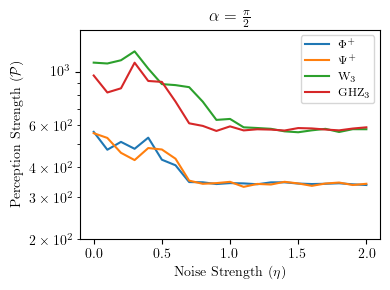

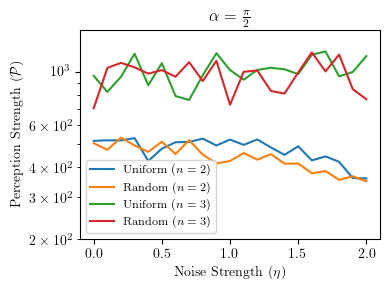

In [12]:

plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'  # Load amsmath package
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(4, 3))
steps=np.linspace(0,1000,1001)

etas=np.linspace(0,2,21)
labels=['bell1','bell3','w','ghz']
legnds=[r'$\Phi^+$',r'$\Psi^+$',r'$\text{W}_3$',r'$\text{GHZ}_3$']

for label in labels:
    data=df[(df['label']==label)]
    y=[el.tolist() for el in data['P'].to_list()]
    y=np.asarray(y)
    plt.plot(etas,np.mean(y[:,40:60],axis=1))

plt.ylim([200,1500])

plt.xlabel(r'Noise Strength ($\eta$)')
plt.ylabel(r'Perception Strength ($\cal{P}$)')
# plt.ylim([0,1])
plt.legend(legnds, fontsize='small')
plt.yscale('log')

plt.title(r'$\alpha=\frac{\pi}{2}$')
plt.tight_layout()
plt.savefig(f'plots/perception_eta_alpha90_1.pdf',bbox_inches='tight')
plt.show()


plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'  # Load amsmath package
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(4, 3))
steps=np.linspace(0,1000,1001)

etas=np.linspace(0,2,21)
labels=['sup_2','random_2','sup_3','random_3']
legnds=[r'$\Phi^+$',r'$\Psi^+$',r'$\text{W}_3$',r'$\text{GHZ}_3$']

for label in labels:
    data=df[(df['label']==label)]
    y=[el.tolist() for el in data['P'].to_list()]
    y=np.asarray(y)
    plt.plot(etas,np.mean(y[:,40:60],axis=1))

plt.yscale('log')
plt.xlabel(r'Noise Strength ($\eta$)')
plt.ylabel(r'Perception Strength ($\cal{P}$)')
plt.ylim([200,1500])
plt.legend([r'Uniform ($n=2$)',r'Random ($n=2$)',r'Uniform ($n=3$)',r'Random ($n=3$)'], fontsize='small')

plt.title(r'$\alpha=\frac{\pi}{2}$')
plt.tight_layout()
plt.savefig(f'plots/perception_eta_alpha90_2.pdf',bbox_inches='tight')
plt.show()